###**FRAUD DETECTION WITH CREDIT CARDS TRANSACTIONS**

This notebook explores the processes of fraud detection in python using scikit-learn. It also explores processes that can be used to tackle the challenges of the imbalance nature of fraud detection data. The dataset used contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities containing only numerical input variables which are the result of a PCA transformations for features V1, V2, … V28. The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

#Data Loading and preprocessing

In [ ]:
#loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_df= pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
#lets explore the dataset
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Exploring the target variable 'Class' shows that the data is highly imbalance
credit_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
fraud_count = credit_df['Class'].value_counts()[1]
total_transactions = credit_df.shape[0]
fraud_percentage = (fraud_count / total_transactions) * 100

print("Percentage of fraudulent transactions is {:.2f}%".format(fraud_percentage))

Percentage of fraudulent transactions is 0.17%


In [ ]:
#lets carry out summary statistics on the labels of our target variable
Fraud = credit_df[credit_df['Class'] == 1]
Valid = credit_df[credit_df['Class'] == 0]

In [ ]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
Valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

notice that the mean of fraud activities is high inspite of the transactions being extremely low. This is why fraud detection is important.

**Exploratory Data Analysis EDA**

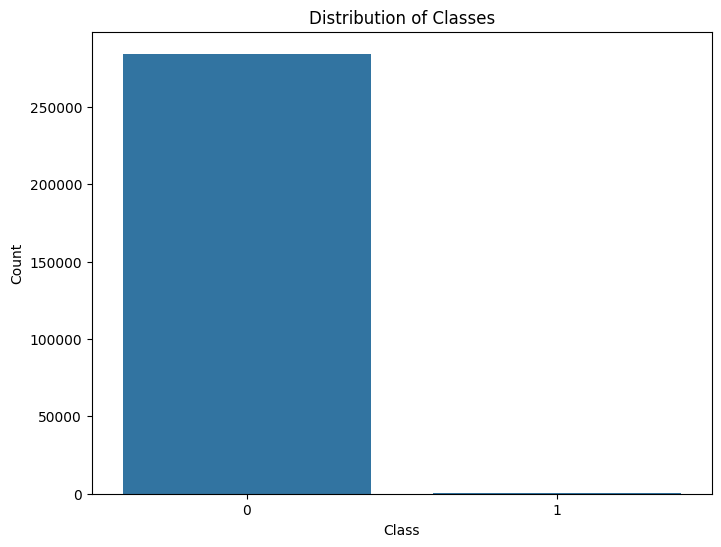

In [ ]:
# Visualizing the target variable 'Class'
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

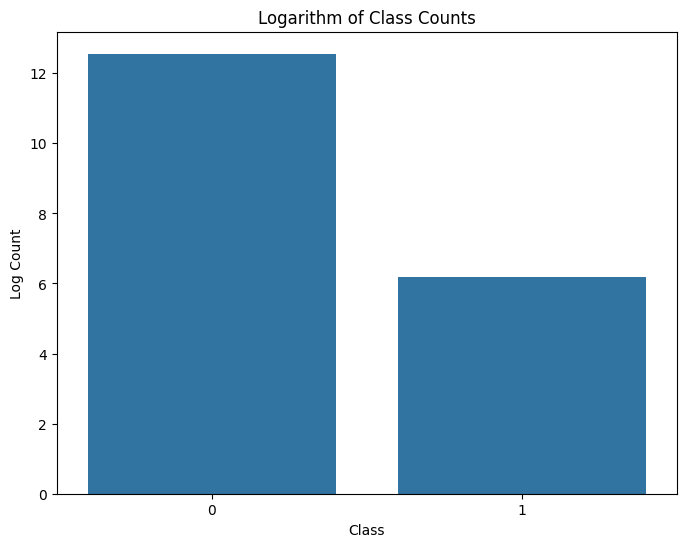

In [ ]:
#in order to visualize better
#Calculate the logarithm of the counts
class_counts = credit_df['Class'].value_counts()
log_class_counts = np.log(class_counts)

# Visualizing the logarithm of the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=log_class_counts.index, y=log_class_counts.values)
plt.title('Logarithm of Class Counts')
plt.xlabel('Class')
plt.ylabel('Log Count')
plt.show()

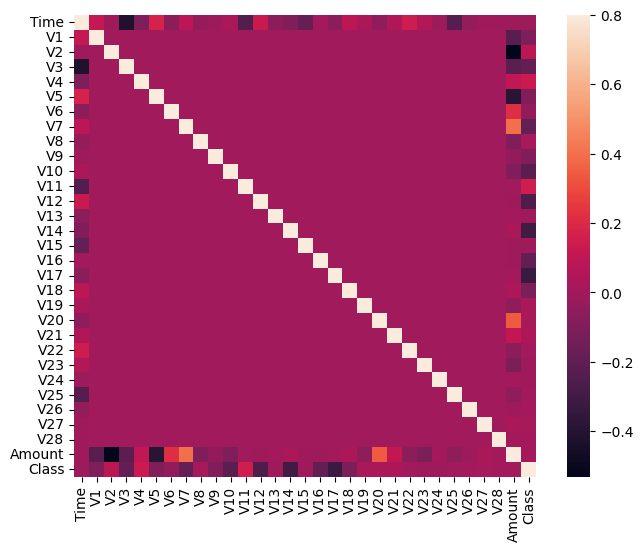

In [ ]:
#Correlation matrix graphically
#gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.
c_mat = credit_df.corr()
fig = plt.figure(figsize = (8, 6))
sns.heatmap(c_mat, vmax = .8, square = True)
plt.show()

In [ ]:
def plot_feature_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.distplot(np.log(data[column_name][data['Class'] == 1] + 1), bins=50, label='Fraudulent', color='red')
    sns.distplot(np.log(data[column_name][data['Class'] == 0] + 1), bins=50, label='Non-Fraudulent', color='blue')
    plt.xlabel('')
    plt.ylabel('Density')
    plt.title('Histogram of Feature: ' + column_name)
    plt.legend()
    plt.show()


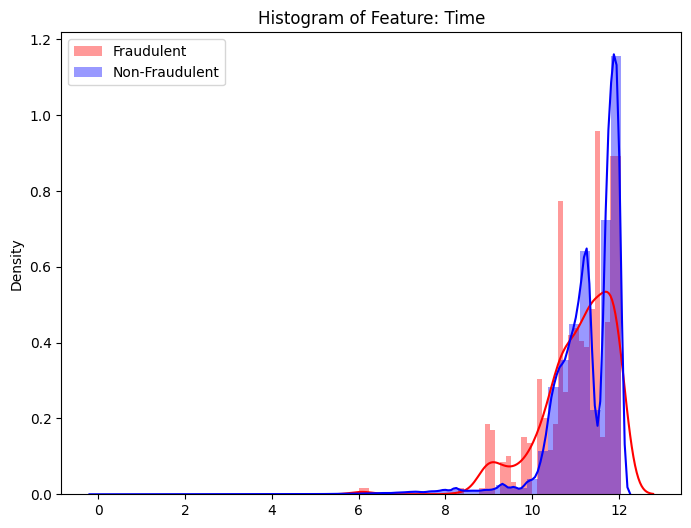

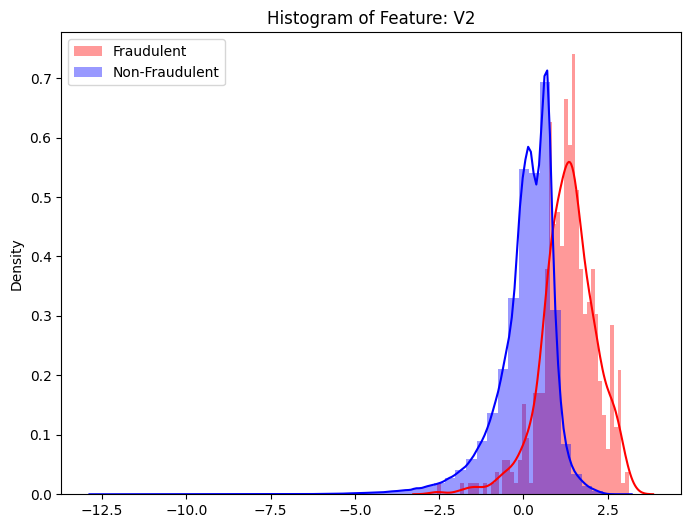

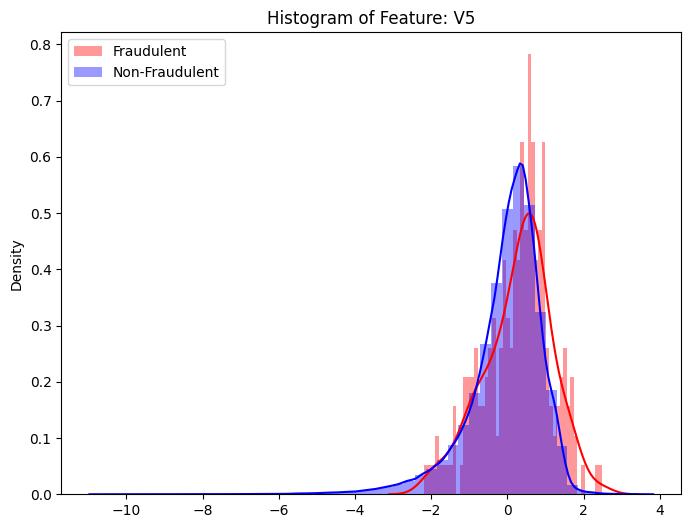

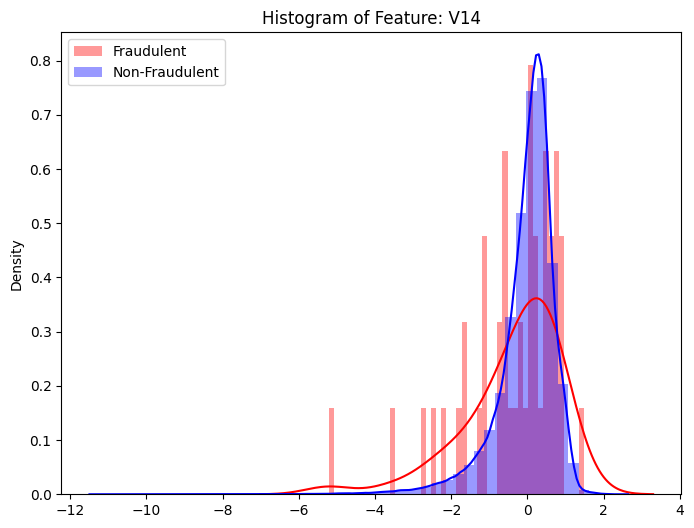

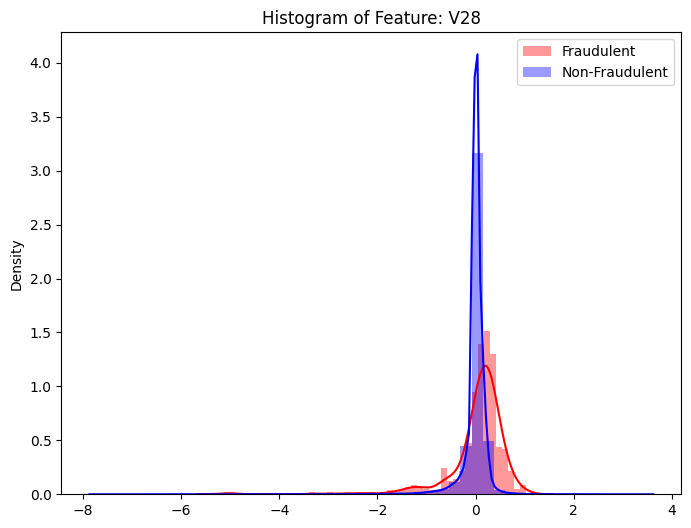

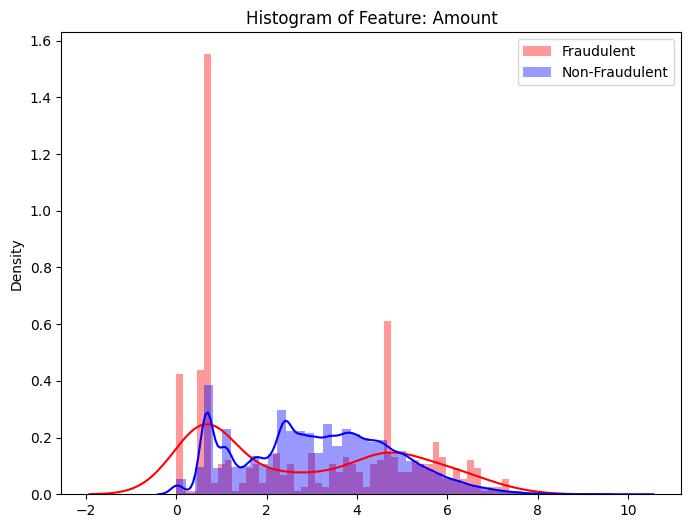

In [ ]:
column_to_plot = ['Time', 'V2', 'V5','V14','V28','Amount']
for i in column_to_plot:
  plot_feature_histogram(data=credit_df, column_name=i)

we used the log to transform the values above as the initial plot of the original values were compressed and we were not able to have a clear visual.
we notice that the amount feature is very rightly skewed. this may be misleading to  the model

<Axes: xlabel='Amount'>

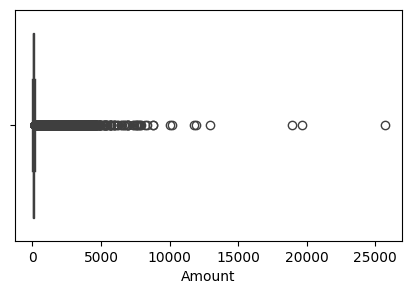

In [ ]:
#lets check for outliers
plt.figure(figsize=(5, 3))

sns.boxplot(x='Amount',data=credit_df)

because of how imbalance our data is, we will be keeping the outliers so as not to loose some information.

In [ ]:
#lets try to remove the extreme outliers
credit_df = credit_df[credit_df['Amount'] <= 10000]

In [ ]:
#let check our target variable again
credit_df['Class'].value_counts()

Class
0    284308
1       492
Name: count, dtype: int64

**Data Preprocessing**

In [ ]:
#lets scale the values of the feature'Amount'
#instatiate the scaler
scaler = StandardScaler()

# Reshape the 'Amount' column to a 2D array as standardScaler expects 2D input
amount_column = credit_df['Amount'].values.reshape(-1, 1)

# Scale the 'Amount' column using standard scaling
scaled_amount = scaler.fit_transform(amount_column)

# Replace the original 'Amount' column with the scaled values
credit_df['Amount'] = scaled_amount


In [ ]:
credit_df.Amount.describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

<Axes: xlabel='Amount'>

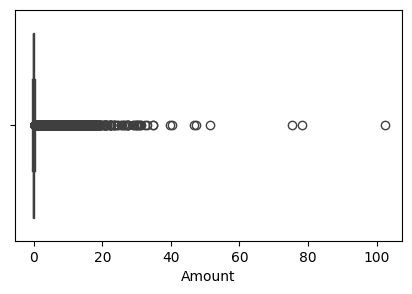

In [ ]:
plt.figure(figsize=(5, 3))

sns.boxplot(x='Amount',data=credit_df)

In [ ]:
#lets try to remove the extreme outliers
credit_df = credit_df[credit_df.Amount <= 50]

In [ ]:
#let check our target variable again
credit_df['Class'].value_counts()

Class
0    284311
1       492
Name: count, dtype: int64

notice that we do not loose our fraud class as they are very few.

<Axes: xlabel='Amount'>

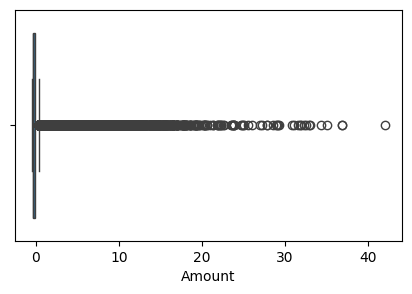

In [ ]:
plt.figure(figsize=(5, 3))

sns.boxplot(x='Amount',data=credit_df)

In [ ]:
#define X and y
X = credit_df.drop(['Class'], axis=1).values
y = credit_df['Class'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#since this is a highly imbalanced data, lets split with stratified sampling technique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
#lets resample the training data
#smote is a preferred sampling technique because of how highly imbalanced the data is
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


**Building the model**

In [ ]:
#lets try building a model on our data just the way it is

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(40)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred = model.predict(X_test)
        # Calculate F1-score and store in the model_scores dictionary
        model_scores[name] = classification_report(y_test, y_pred)
    return model_scores

In [ ]:
# Define the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "Tree": DecisionTreeClassifier(),
    "Support Vector": SVC()
}


In [ ]:
# Call the function
model_classification_reports = fit_and_score(models, X_train, X_test, y_train, y_test)
# Print the classification reports
for model, report in model_classification_reports.items():
    print(f"Classification Report for {model}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.67      0.68      0.67       148

    accuracy                           1.00     85440
   macro avg       0.84      0.84      0.84     85440
weighted avg       1.00      1.00      1.00     85440


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.95      0.76      0.84       148

    accuracy                           1.00     85440
   macro avg       0.97      0.88      0.92     85440
weighted avg       1.00      1.00      1.00     85440


Classification Report for GB:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.90      0.68      0.78       148

    accuracy                           1.00     85440
   macro

notice how the classification reports for the different models exhibit high accuracy on the majority class ('0') but their performance on the minority class ('1') is lower and varies. Improving the models' ability to detect fraudulent transactions (class '1') would likely require further optimization, possibly through techniques such as resampling or adjusting class weights

In [ ]:

# Create function to fit and score models with resampled training data
def fit_and_report(models, X_train_resampled, X_test, y_train_resampled, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train_resampled : training data
    X_test : testing data
    y_train_resampled : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(40)
    # Make a dictionary to keep model scores
    model_reports = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_resampled, y_train_resampled)
        # Predict on test set
        y_pred = model.predict(X_test)
        # Calculate F1-score and store in the model_scores dictionary
        model_reports[name] = classification_report(y_test, y_pred)
    return model_reports



# Call the function
model_classification_reports = fit_and_report(models, X_train_resampled, X_test, y_train_resampled, y_test)
# Print the classification reports
for model, report in model_classification_reports.items():
    print(f"Classification Report for {model}:\n{report}\n")


we see Random Forest model performing the best for both labels of the response variable but for some reason the performance of my models indicate  that there may be a data leakage. to overcome this, I'll use an even more robust method of a stratified kfold cross validation across my models

In [ ]:

# Define the number of folds for stratified k-fold cross-validation
n_splits = 5

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create lists to store classification reports for each model
model_reports = {}

# Loop through models
for model_name, model in models.items():
    # Initialize lists to store metrics across folds
    precision_list = []
    recall_list = []
    f1_score_list = []

    # Loop through folds
    for train_index, test_index in stratified_kfold.split(X, y):
        # Split data into train and test sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        y_pred = model.predict(X_test)

        # Generate classification report for this fold
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract metrics from the classification report
        precision_list.append(report['1']['precision'])
        recall_list.append(report['1']['recall'])
        f1_score_list.append(report['1']['f1-score'])

    # Calculate mean metrics across folds
    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_f1_score = sum(f1_score_list) / len(f1_score_list)

    # Store mean metrics in the model_reports dictionary
    model_reports[model_name] = {'precision': mean_precision, 'recall': mean_recall, 'f1-score': mean_f1_score}

# Print the classification reports for each model
for model_name, report in model_reports.items():
    print(f"Classification Report for {model_name}:")
    print(f"Precision: {report['precision']}")
    print(f"Recall: {report['recall']}")
    print(f"F1-score: {report['f1-score']}\n")


Classification Report for Logistic Regression:
Precision: 0.7196649030687425
Recall: 0.6685425685425685
F1-score: 0.6931185595469591

Classification Report for Random Forest:
Precision: 0.9508446753981037
Recall: 0.7844980416408988
F1-score: 0.8596509697112686

Classification Report for GB:
Precision: 0.7929217340630383
Recall: 0.4950319521748094
F1-score: 0.5783652686982017

Classification Report for Tree:
Precision: 0.7674016303992728
Recall: 0.7681921253349826
F1-score: 0.7672853904456073

Classification Report for Support Vector:
Precision: 0.0
Recall: 0.0
F1-score: 0.0



we now see clearly that the Random Forest model is still performing best with 95% precision rate and an F1_score of 0.86. it is follwed by the Decision Tree model with a precision rate of 77% and an F1_score of 0.77

*Hyper parameter optimization/tuning**

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50,100,200],  # Number of trees in the forest
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']
    }

# Initialize GridSearchCV with the Random Forest classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1, verbose=2)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


In [ ]:
# Evaluate the best model on the test set
y_pred = best_estimator.predict(X_test)

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))